### This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np

print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-03 11:18:06--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  36.2MB/s   in 1.9s   

2020-09-03 11:18:09 (36.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [24]:
df = pd.read_csv('Data-Collisions.csv')
#df.head()

In [26]:
# Dataset is imbalanced
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Random under-sampling:
2    58188
1    58188
Name: SEVERITYCODE, dtype: int64


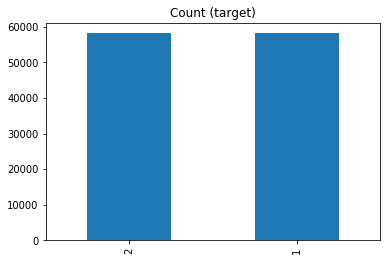

In [40]:
## Resampling imbalanced dataset

# Class count
count_class_1, count_class_2 = df.SEVERITYCODE.value_counts()

# Divide by class
df_class_1 = df[df['SEVERITYCODE'] == 1]
df_class_2 = df[df['SEVERITYCODE'] == 2]

df_class_1_under = df_class_1.sample(count_class_2)
df_test_under = pd.concat([df_class_1_under, df_class_2], axis=0)

print('Random under-sampling:')
print(df_test_under.SEVERITYCODE.value_counts())

df_test_under.SEVERITYCODE.value_counts().plot(kind='bar', title='Count (target)');

In [41]:
# Dropping records with 'NaN' values within selected feature columns
df_test_under.dropna(subset = ['SEVERITYCODE', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE'], inplace=True)

In [29]:
df_test_under['ADDRTYPE'].value_counts()

Block           69412
Intersection    42883
Alley             364
Name: ADDRTYPE, dtype: int64

In [30]:
df_test_under['ROADCOND'].value_counts()

Dry               75567
Wet               29160
Unknown            6541
Ice                 648
Snow/Slush          520
Other                71
Standing Water       63
Sand/Mud/Dirt        49
Oil                  40
Name: ROADCOND, dtype: int64

In [31]:
df_test_under['LIGHTCOND'].value_counts()


Daylight                    71263
Dark - Street Lights On     28758
Unknown                      5874
Dusk                         3584
Dawn                         1540
Dark - No Street Lights       843
Dark - Street Lights Off      669
Other                         121
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [48]:
# Bene playing with groupby to possibly spot factors relationsship
#df_test_under[['ADDRTYPE', 'LIGHTCOND', 'SEVERITYCODE', 'OBJECTID']].groupby(['ADDRTYPE', 'LIGHTCOND', 'SEVERITYCODE']).count()
df_test_under.groupby(['ADDRTYPE', 'LIGHTCOND'] )['SEVERITYCODE'].value_counts(normalize=False)

ADDRTYPE      LIGHTCOND                 SEVERITYCODE
Alley         Dark - No Street Lights   1                  21
                                        2                   7
              Dark - Street Lights Off  1                   6
              Dark - Street Lights On   1                  58
                                        2                  16
              Dawn                      1                   3
                                        2                   1
              Daylight                  1                 145
                                        2                  50
              Dusk                      2                   5
                                        1                   3
              Other                     1                   1
              Unknown                   1                  44
                                        2                   1
Block         Dark - No Street Lights   1                 401
                 

In [49]:
df_test_under['LIGHTCOND'].replace(to_replace=['Dark - Street Lights Off','Dark - No Street Lights', 'Dark - Unknown Lighting', 'Unknown','Other', 'Dusk', 'Dawn','Dark - Street Lights On','Daylight'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df_test_under.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
24350,1,-122.321439,47.547503,28876,42499,42499,C657443,Matched,Intersection,33135.0,...,Dry,8,NaN,5275040.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
122023,1,-122.283298,47.532437,135603,151906,151926,3336009,Matched,Block,NaN,...,Dry,7,NaN,NaN,NaN,32,One parked--one moving,0,0,N
51933,1,-122.313836,47.678034,57677,70982,70982,2830201,Matched,Block,NaN,...,Unknown,8,NaN,7150046.0,NaN,32,One parked--one moving,0,0,N
6166,1,-122.387957,47.544746,7584,21338,21338,1481921,Matched,Block,NaN,...,Dry,8,NaN,4088020.0,NaN,30,From opposite direction - all others,0,0,N
146920,1,-122.327509,47.686926,163366,205487,205647,E474555,Matched,Block,NaN,...,Dry,8,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N


In [50]:
df_test_under['lightcondclass'] = df_test_under['LIGHTCOND'].apply(lambda x: 1 if (x>6)  else 0)
df_test_under.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,lightcondclass
24350,1,-122.321439,47.547503,28876,42499,42499,C657443,Matched,Intersection,33135.0,...,8,NaN,5275040.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N,1
122023,1,-122.283298,47.532437,135603,151906,151926,3336009,Matched,Block,NaN,...,7,NaN,NaN,NaN,32,One parked--one moving,0,0,N,1
51933,1,-122.313836,47.678034,57677,70982,70982,2830201,Matched,Block,NaN,...,8,NaN,7150046.0,NaN,32,One parked--one moving,0,0,N,1
6166,1,-122.387957,47.544746,7584,21338,21338,1481921,Matched,Block,NaN,...,8,NaN,4088020.0,NaN,30,From opposite direction - all others,0,0,N,1
146920,1,-122.327509,47.686926,163366,205487,205647,E474555,Matched,Block,NaN,...,8,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,1


In [39]:
# Looks like accident severity is higher in intersections when visibility is good. In contrast, if accident happens in blocks, severity is higher with not optimal light condition.
#df_test_under.groupby(['ADDRTYPE', 'LIGHTCOND'] )['SEVERITYCODE'].value_counts(normalize=True)
df_test_under.groupby(['lightcondclass'] )['SEVERITYCODE'].value_counts(normalize=False)

lightcondclass  SEVERITYCODE
0               1                8581
                2                4057
1               2               52858
                1               47163
Name: SEVERITYCODE, dtype: int64

In [54]:
X = df_test_under[['ADDRTYPE', 'LIGHTCOND', 'ROADCOND']].values
X[0:5]

array([['Intersection', 8, 'Dry'],
       ['Block', 7, 'Dry'],
       ['Block', 8, 'Unknown'],
       ['Block', 8, 'Dry'],
       ['Block', 8, 'Dry']], dtype=object)

In [55]:
from sklearn import preprocessing
#le_lightcond = preprocessing.LabelEncoder()
#le_lightcond.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'])
#X[:,1] = le_lightcond.transform(X[:,1]) 



le_addr = preprocessing.LabelEncoder()
le_addr.fit([ 'Block', 'Intersection', 'Alley'])
X[:,0] = le_addr.transform(X[:,0])

le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit([ 'Dry', 'Wet', 'Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,2] = le_roadcond.transform(X[:,2])

#le_weather = preprocessing.LabelEncoder()
#le_weather.fit([ 'Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
#X[:,2] = le_weather.transform(X[:,2]) 


X[0:5]

array([[2, 8, 0],
       [1, 7, 0],
       [1, 8, 7],
       [1, 8, 0],
       [1, 8, 0]], dtype=object)

In [63]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.27258862,  0.50949648, -0.68746329],
       [-0.76489843, -0.1813832 , -0.68746329],
       [-0.76489843,  0.50949648,  1.23805591],
       [-0.76489843,  0.50949648, -0.68746329],
       [-0.76489843,  0.50949648, -0.68746329]])

In [57]:
y = df_test_under['SEVERITYCODE']
y[0:5]

24350     1
122023    1
51933     1
6166      1
146920    1
Name: SEVERITYCODE, dtype: int64

In [58]:


from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss



In [64]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('X_trainset.shape: ', X_trainset.shape)
print('y_trainset.shape: ', y_trainset.shape)

X_trainset.shape:  (78878, 3)
y_trainset.shape:  (78878,)


In [60]:
from sklearn.tree import DecisionTreeClassifier

sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
sevTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
sevTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
predTree = sevTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])
print("Decision Tree: Avg F1-score: %.4f" % f1_score(y_testset, predTree, average='weighted'))
print("Decision Tree: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, predTree))

[1 1 1 1 2]
125052    2
114383    2
11661     2
34091     2
82358     2
Name: SEVERITYCODE, dtype: int64
Decision Tree: Avg F1-score: 0.5999
Decision Tree: Jaccard score: 0.6057


In [46]:
from sklearn import svm
sev_svm = svm.SVC(kernel='linear')

sev_svm.fit(X_trainset, y_trainset) 
yhat_svm = sev_svm.predict(X_testset)
print("SVM: Avg F1-score: %.4f" % f1_score(y_testset, yhat_svm, average='weighted'))
print("SVM: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, yhat_svm))

SVM: Avg F1-score: 0.5986
SVM: Jaccard score: 0.6045


In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc



array([0.53495459, 0.51456197, 0.57910929, 0.5776443 , 0.5892763 ,
       0.58001758, 0.56308233, 0.57228245, 0.57330794])

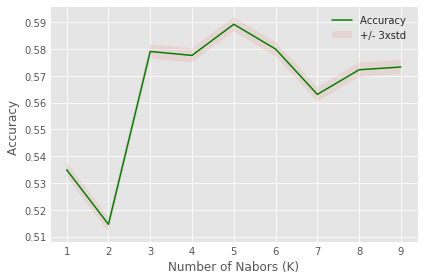

The best accuracy was with 0.5892762965133314 with k= 5


In [196]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [198]:
k = 5
#Train Model and Predict  
Kneigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
Kneigh

yhat_knn = Kneigh.predict(X_testset)
print("KNN: Avg F1-score: %.4f" % f1_score(y_testset, yhat_knn, average='weighted'))
print("KNN: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, yhat_knn))

KNN: Avg F1-score: 0.5893
KNN: Jaccard score: 0.5893


In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)


yhat_lr = LR.predict(X_testset)
yhat_prob = LR.predict_proba(X_testset)
print("Logistic Regression: Avg F1-score: %.4f" % f1_score(y_testset, yhat_lr, average='weighted'))
print("Logistic regression: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, yhat_lr))
print("Logistic regression: Log Loss: %.4f" % log_loss(y_testset, yhat_prob))



Logistic Regression: Avg F1-score: 0.5995
Logistic regression: Jaccard score: 0.6056
Logistic regression: Log Loss: 0.6628


In [66]:
X = df_test_under[['ADDRTYPE']].values
X[0:5]

array([['Intersection'],
       ['Block'],
       ['Block'],
       ['Block'],
       ['Block']], dtype=object)

In [67]:
le_addr = preprocessing.LabelEncoder()
le_addr.fit([ 'Block', 'Intersection', 'Alley'])
X[:,0] = le_addr.transform(X[:,0])

In [68]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('X_trainset.shape: ', X_trainset.shape)
print('y_trainset.shape: ', y_trainset.shape)

X_trainset.shape:  (78878, 1)
y_trainset.shape:  (78878,)


In [69]:
from sklearn.tree import DecisionTreeClassifier

sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
sevTree # it shows the default parameters
sevTree.fit(X_trainset,y_trainset)
predTree = sevTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])
print("Decision Tree: Avg F1-score: %.4f" % f1_score(y_testset, predTree, average='weighted'))
print("Decision Tree: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, predTree))

[1 1 1 1 2]
125052    2
114383    2
11661     2
34091     2
82358     2
Name: SEVERITYCODE, dtype: int64
Decision Tree: Avg F1-score: 0.5984
Decision Tree: Jaccard score: 0.6045
